 # Predicción de Series Temporales
 # Predicción Ingresos Coca-Cola (KO)
 ## Modelos ARIMA
 


In [1]:
# Styling notebook
# from IPython.core.display import HTML
# def css_styling():
#     styles = open("style.css", "r",encoding="utf-8").read()
#     return HTML(styles)
# css_styling()

In [2]:
import warnings
warnings.filterwarnings('ignore')

 # Introducción

 <div class="exercise">

 - El objetivo es predecir las ventas de Coca-Cola.

 - Se realizan diferentes predicciones de las ventas de Coca-Cola.

 - Se tienen datos trimestrales desde 1991-1T hasta 2021-2T.

 - Se dejan fuera de la estimación los ocho últimos trimestres para seleccionar el mejor modelo.

 - Se uestiman los modelos ARIMA

 </div>


In [3]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Read Data
ko_df = pd.read_csv('ko.csv',sep=';')
ko_df['Fecha'] = pd.to_datetime(ko_df['Fecha'],format="%Y%m%d")
ko_df = ko_df.set_index('Fecha')
ko_df.head()

,Ingresos
Fecha,
2021-06-03,10129
2021-03-03,9020
2020-12-31,8611
2020-09-26,8652
2020-06-27,7150


 <div class="redcuadro">

 Convertimos los datos en trimestrales

 </div>

In [5]:
# Resample to Quarterly I
ko_ts=ko_df.resample("q").last()
ko_ts.tail()

,Ingresos
Fecha,
2020-06-30,7150
2020-09-30,8652
2020-12-31,8611
2021-03-31,9020
2021-06-30,10129


In [6]:
# Resample to Quarterly II
# SKtime format
ko_ts_q=ko_df['Ingresos'].astype('float64').to_period('Q').sort_index()
ko_ts_q.tail()

Fecha
2020Q2     7150.0
2020Q3     8652.0
2020Q4     8611.0
2021Q1     9020.0
2021Q2    10129.0
Freq: Q-DEC, Name: Ingresos, dtype: float64

 # Solución

 ## Graficar los Ingresos
 <div class="hr2"> </div>
 - Tendencia -> No estacionario
 - Componente Estacional
 - Varianza no constante

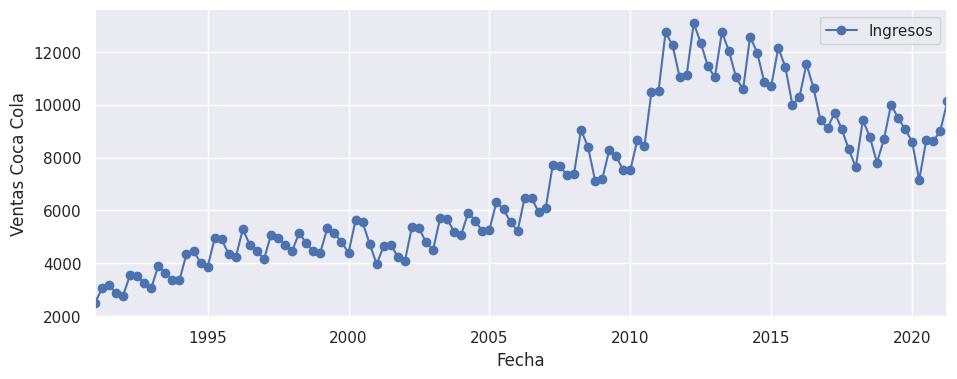

In [7]:
# Plot Data
# Use seaborn style defaults and set the default figure size

import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
ax = ko_ts.plot(marker='o', linestyle='-')
ax.set_ylabel('Ventas Coca Cola');

In [8]:
!pip install sktime

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

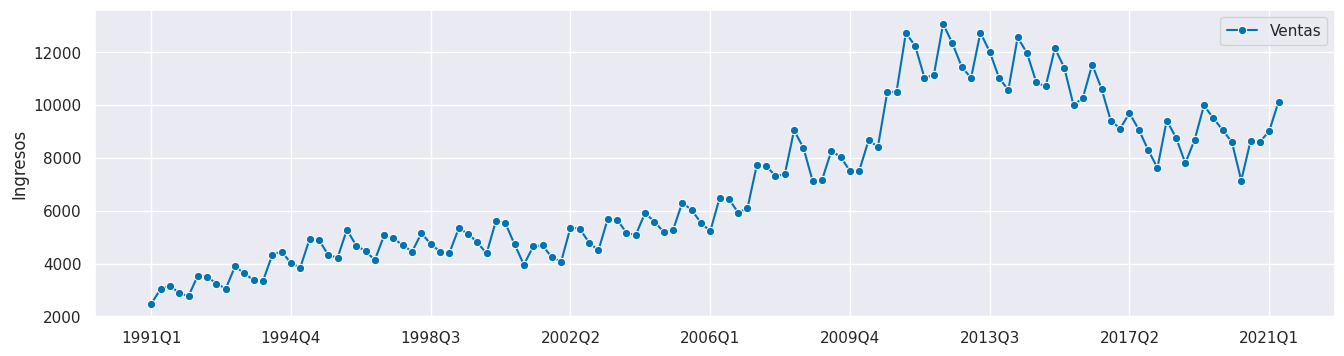

In [9]:
# Plot Data
# Use Sktime style 
from sktime.utils.plotting import plot_series
plot_series(ko_ts_q, labels=["Ventas"])

 # No estacionariedad en Varianza

 <div class="hr2"> </div>
 
 ## Calculamos la transformacion logarítmica de la **Serie Original**

In [10]:
# Log Transformer Function
from sktime.transformations.series.boxcox import LogTransformer

In [11]:
# Apply Log Transformer

transformer = LogTransformer()
log_ko_ts= transformer.fit_transform(ko_ts_q)
log_ko_ts.tail()

2020Q2    8.874868
2020Q3    9.065546
2020Q4    9.060796
2021Q1    9.107200
2021Q2    9.223158
Freq: Q-DEC, Name: Ingresos, dtype: float64

Text(0.5, 1.0, 'Ventas Coca Cola: Transformación LOG')

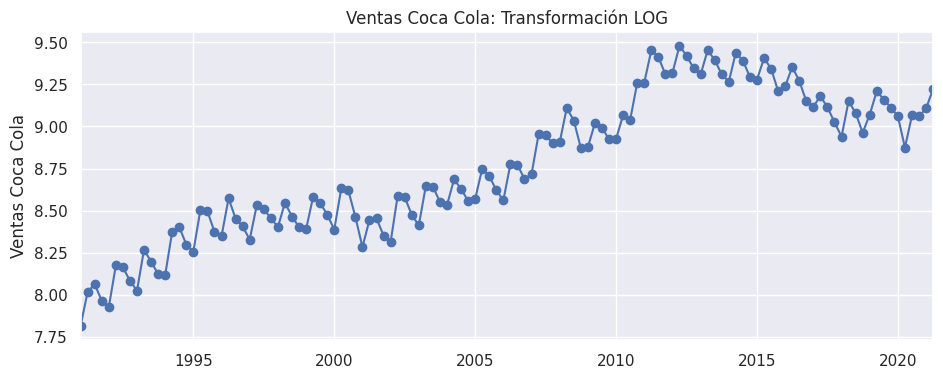

In [12]:
# Plot Log Data
ax = log_ko_ts.plot(marker='o', linestyle='-')
ax.set_ylabel('Ventas Coca Cola')
ax.set_title('Ventas Coca Cola: Transformación LOG')

Text(0.5, 1.0, 'Ventas Coca Cola: Transformación LOG')

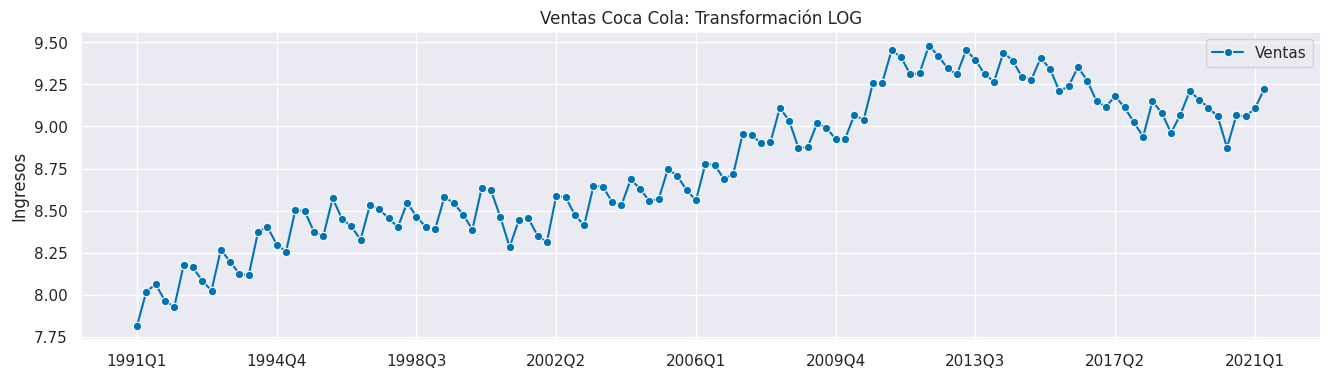

In [13]:
# Plot Log Data
fig, ax =plot_series(log_ko_ts, labels=["Ventas"])
ax.set_title('Ventas Coca Cola: Transformación LOG')

 # No estacionariedad en Varianza

 <div class="hr2"> </div>
 ## Comparamos la transformacion logarítmica de la **Serie Original** y la **Serie en Logs**

Text(0.5, 1.0, 'Ventas Coca Cola: Transformación LOG')

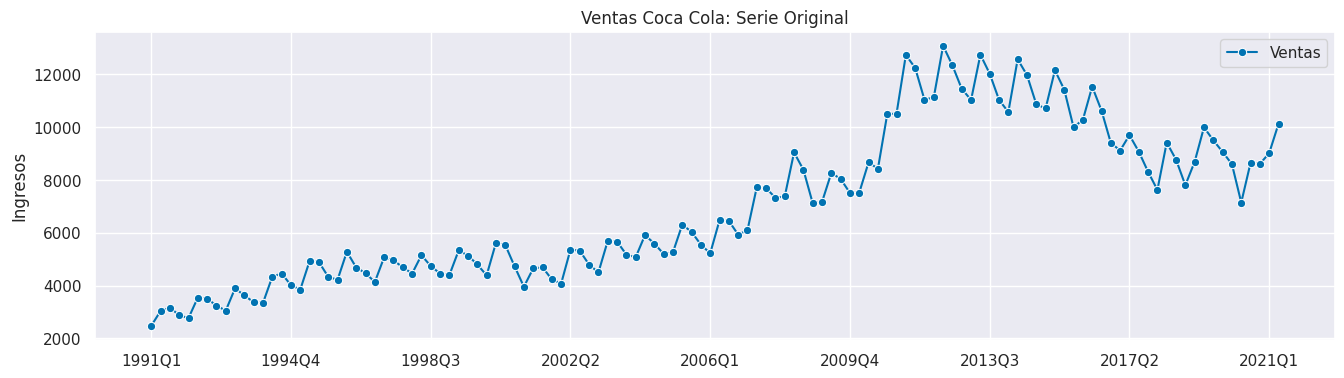

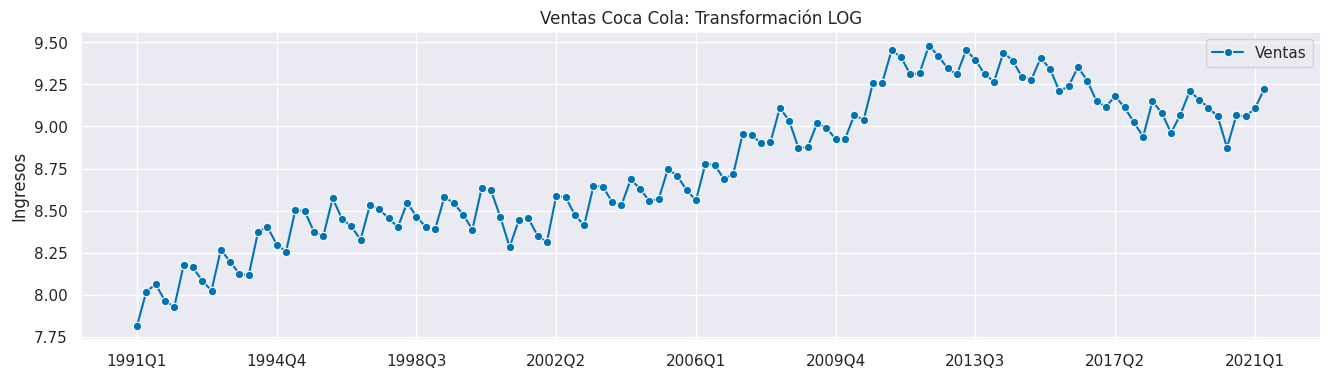

In [14]:
# Plot Log Data & Original Data
fig, ax =plot_series(ko_ts_q, labels=["Ventas"])
ax.set_title('Ventas Coca Cola: Serie Original')
fig, ax =plot_series(log_ko_ts, labels=["Ventas"])
ax.set_title('Ventas Coca Cola: Transformación LOG')

 # Autocorrelación

 <div class="hr2"> </div>
 
 ## Calculamos la Autocorrelación de la **Serie en Logs**

In [15]:
# Autocorrelation Fuction Package
from sktime.utils.plotting import plot_correlations

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: ylabel='Ingresos'>,
        <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

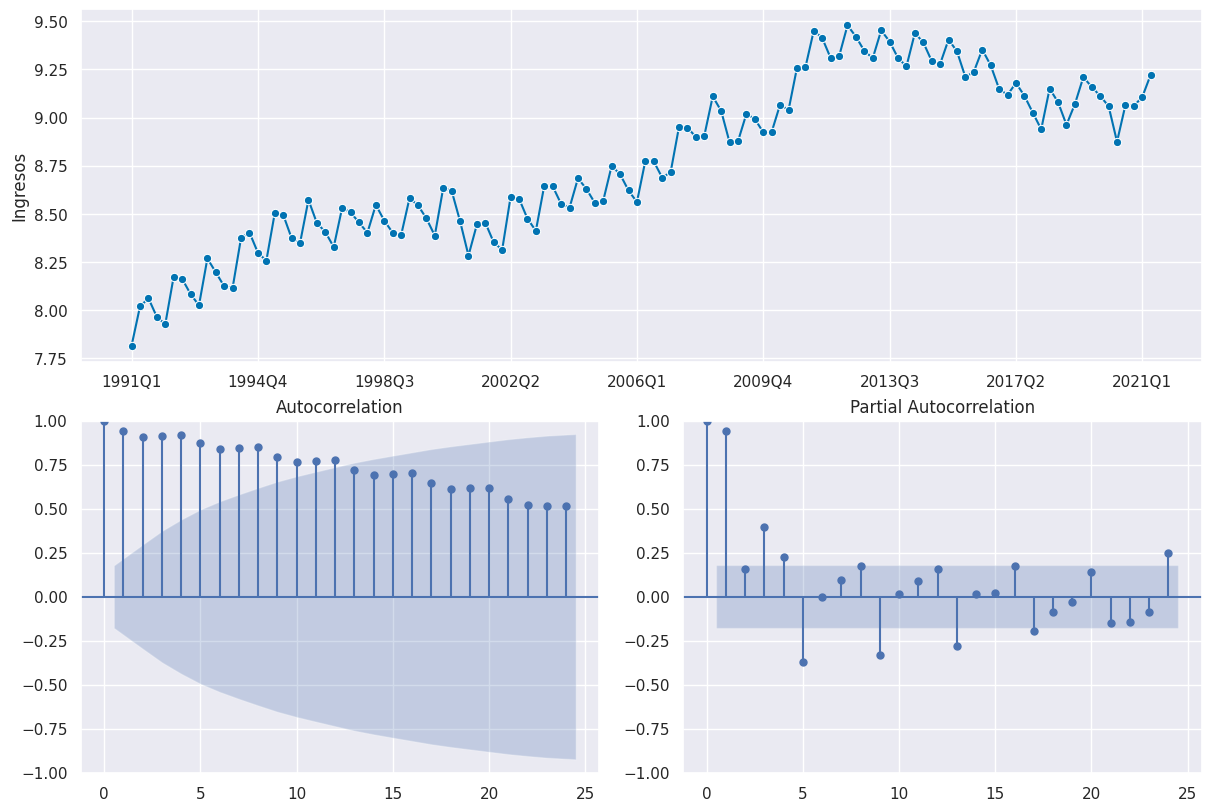

In [16]:
# Autocorrelation Fuction Original Time Series
plot_correlations(log_ko_ts)

In [17]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(log_ko_ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -1.356813
p-value: 0.602797


In [18]:
# Difference Fuction Package
from sktime.transformations.series.difference import Differencer

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: ylabel='Ingresos'>,
        <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

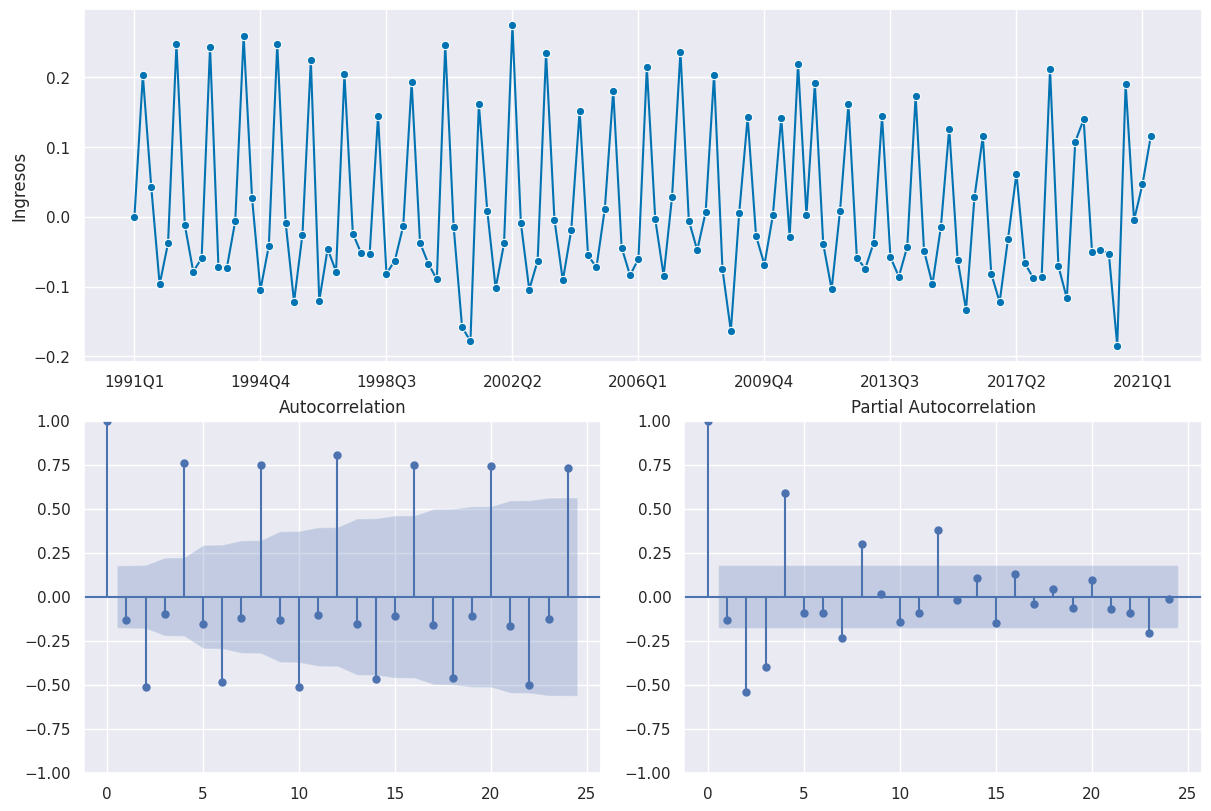

In [19]:
# Autocorrelation Fuction
# d=1; D=0; S=4
# 
transf_diff=Differencer(lags=[1])
plot_correlations(transf_diff.fit_transform(log_ko_ts))

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: ylabel='Ingresos'>,
        <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

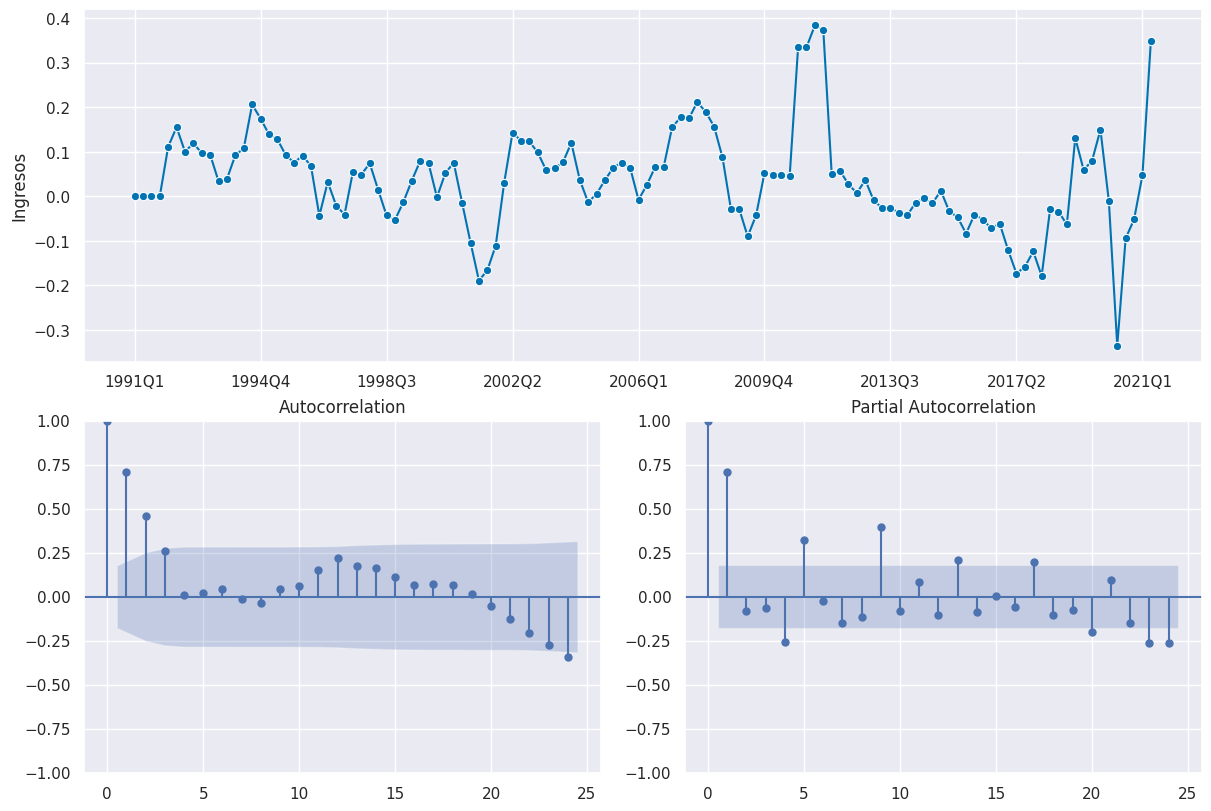

In [20]:
# Autocorrelation Fuction
# d=0; D=1; S=4
# 
transf_diff=Differencer(lags=[4])
plot_correlations(transf_diff.fit_transform(log_ko_ts))

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: ylabel='Ingresos'>,
        <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

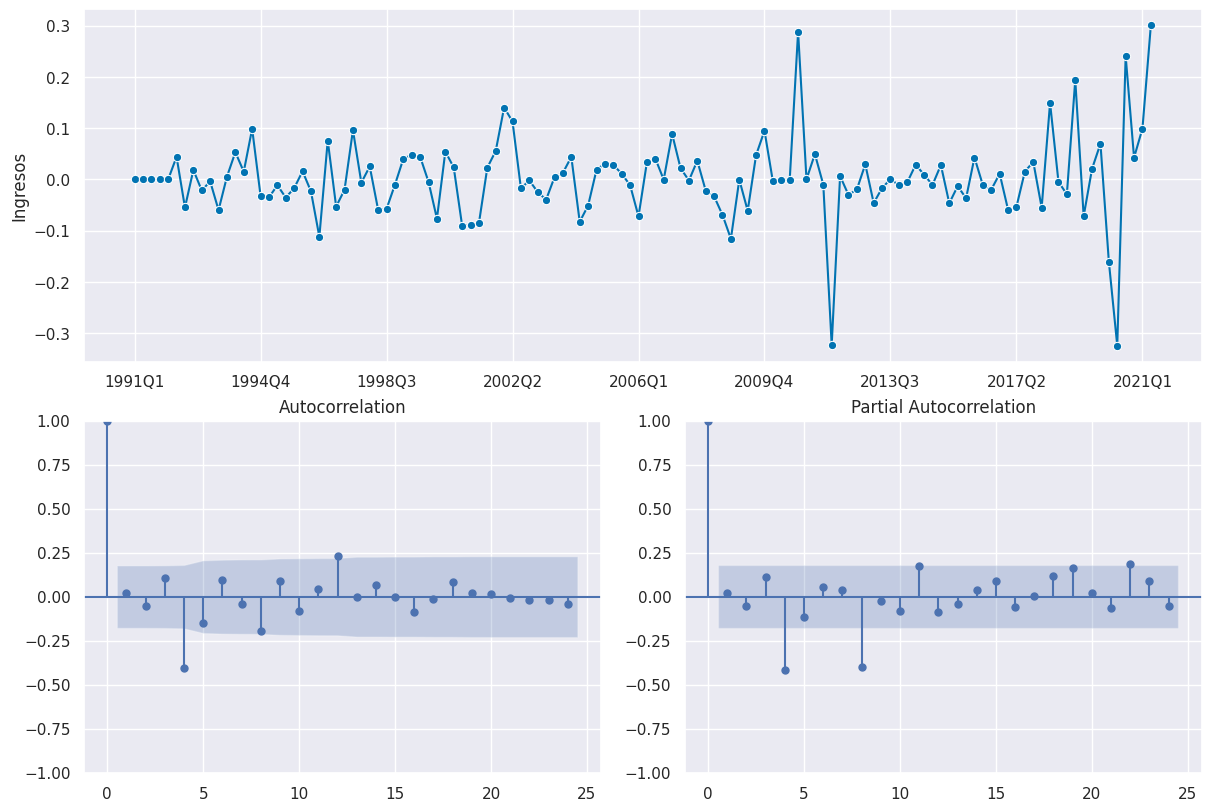

In [21]:
# Autocorrelation Fuction
# d=1; D=1; S=4
# 
transf_diff=Differencer(lags=[1,4])
plot_correlations(transf_diff.fit_transform(log_ko_ts))

 # Modelos ARIMA

 <div class="redcuadro">

 Vamos a separar la muestra en la parte de estiamción (Training) y la parte de predicción/Verificación (Testing). Quitamos 8 trimestres. <br><br>

 Vamos a predecir 8 periodos  (h=8)<br><br>

 </div>

In [22]:
# Sktime fucntions
# Forecast horizon and Split function 
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split

114 8


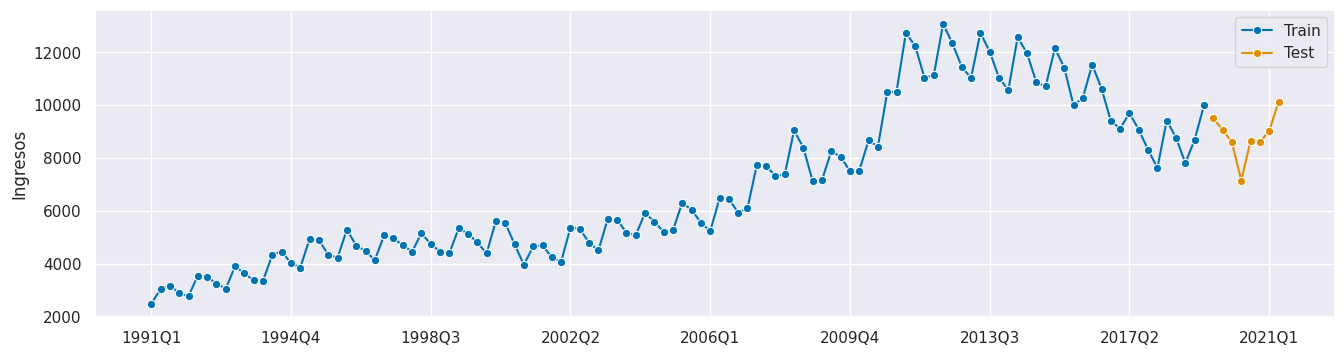

In [23]:
# Select Train & test sample
# we will try to forecast y_test from y_train
# plotting for illustration
# original and log samples
y_train, y_test = temporal_train_test_split(y =ko_ts_q, test_size=8)
log_y_train, log_y_test = temporal_train_test_split(y =log_ko_ts, test_size=8)
plot_series(y_train, y_test, labels=["Train", "Test"])
# Time Series Size
print(y_train.shape[0], y_test.shape[0])

In [24]:
# Forecast Horizon
fh = np.arange(len(y_test)) + 1  # forecasting horizon
fh

array([1, 2, 3, 4, 5, 6, 7, 8])

In [25]:
# Sktime Auto ARIMA Function
from sktime.forecasting.arima import AutoARIMA

In [26]:
#  Auto ARIMA Model

forecaster = AutoARIMA(sp=4,suppress_warnings=True)
forecaster.fit(log_y_train)

AutoARIMA(sp=4, suppress_warnings=True)

In [27]:
#  Auto ARIMA Model Summary
print(forecaster.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  114
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 4)   Log Likelihood                 167.994
Date:                             Fri, 24 May 2024   AIC                           -329.988
Time:                                     12:08:22   BIC                           -321.806
Sample:                                 03-31-1991   HQIC                          -326.668
                                      - 06-30-2019                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L4        0.9963      0.004    259.082      0.000       0.989       1.004
ma.S.L4       -0.8220      

In [28]:
#  Auto ARIMA Forecast
log_y_pred = forecaster.predict(fh)
log_y_pred

2019Q3    9.153841
2019Q4    9.064388
2020Q1    9.061416
2020Q2    9.209280
2020Q3    9.153289
2020Q4    9.064168
2021Q1    9.061207
2021Q2    9.208522
Freq: Q-DEC, Name: Ingresos, dtype: float64

In [29]:
#  Auto ARIMA Forecast
# Original Time series (Invert log transformation)
np.exp(log_y_pred)

2019Q3    9450.668889
2019Q4    8641.986464
2020Q1    8616.340091
2020Q2    9989.398093
2020Q3    9445.452726
2020Q4    8640.085204
2021Q1    8614.539514
2021Q2    9981.830153
Freq: Q-DEC, Name: Ingresos, dtype: float64

In [30]:
# Sktime fucntions
# Forecast Accuracy MAPE & MSE & RMSE
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError

In [31]:
# Forecast Accuracy
# MAPE
mean_absolute_percentage_error(log_y_test, log_y_pred)

0.007561848047036276

In [32]:
# Forecast Accuracy
# MAPE 
# Orignal Time Serie

mean_absolute_percentage_error(y_test, np.exp(log_y_pred))

0.07579664790899364

In [33]:
# Forecast Accuracy
#Mean Squared Error
rmse = MeanSquaredError(square_root=True)
rmse(log_y_test, log_y_pred)

0.12461194099716882

In [34]:
# Forecast Accuracy
#Mean Squared Error
rmse = MeanSquaredError(square_root=True)
rmse(y_test, np.exp(log_y_pred))

1064.398182087576

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

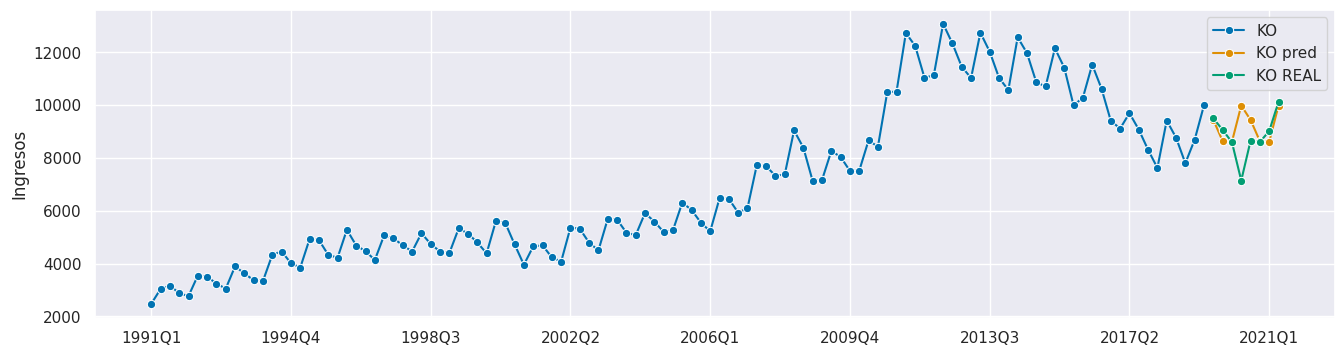

In [35]:
# Forecast Accuracy Plot
# Plotting predictions and past data
plot_series(y_train, np.exp(log_y_pred),y_test, labels=["KO", "KO pred", "KO REAL"])

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

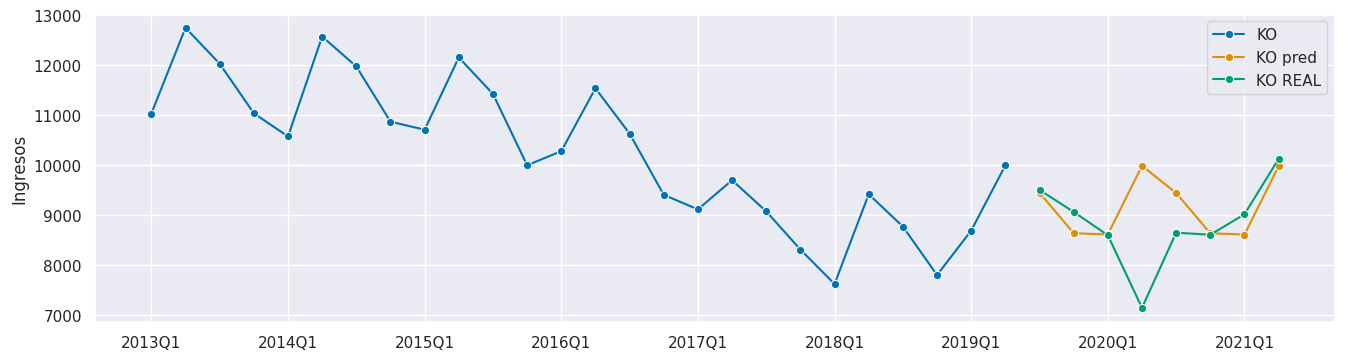

In [36]:
# Forecast Accuracy Plot
# Plotting predictions and past data
# Zoom 2013 -2021
plot_series(y_train["2013":], np.exp(log_y_pred),y_test, labels=["KO", "KO pred", "KO REAL"])

FileNotFoundError: [Errno 2] No such file or directory: 'img/04/predict-AutoARIMA-airline-data-plot.png'

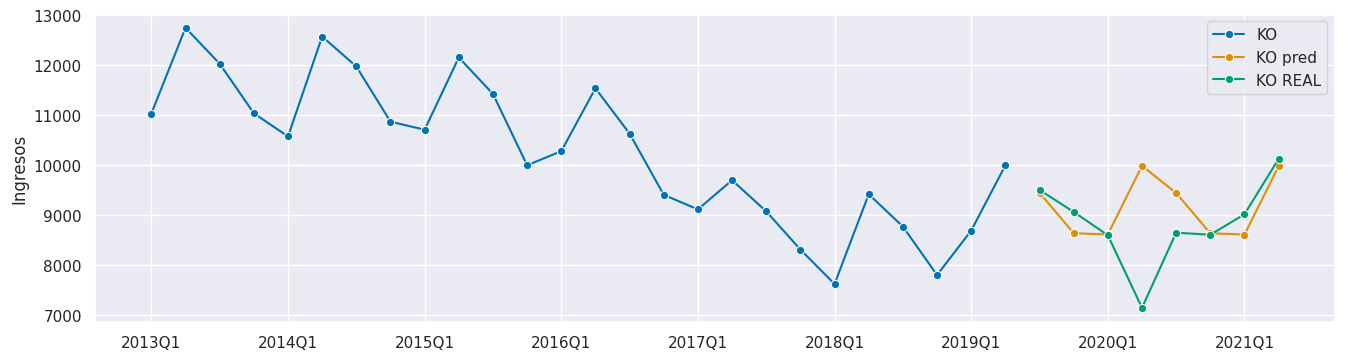

In [37]:
# Save Plot
plot_series(y_train["2013":], np.exp(log_y_pred),y_test, labels=["KO", "KO pred", "KO REAL"])
plt.savefig('img/04/predict-AutoARIMA-airline-data-plot.png',
            dpi=300, bbox_inches='tight')
plt.close('all')

 <div class="redcuadro">

 Vamos a predecir 6 periodos  (h=6), lo que resta del 2021 y el 2022<br><br>

 </div>


In [ ]:
# Forecast Horizon
fh = np.arange(6) + 1  # forecasting horizon
fh

array([1, 2, 3, 4, 5, 6])

In [ ]:
#  Auto ARIMA Model

forecaster = AutoARIMA(sp=4,suppress_warnings=True)
forecaster.fit(log_ko_ts)

AutoARIMA(sp=4, suppress_warnings=True)

In [ ]:
#  Auto ARIMA Model Summary
print(forecaster.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  122
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 4)   Log Likelihood                 156.355
Date:                             Tue, 26 Oct 2021   AIC                           -306.710
Time:                                     17:20:10   BIC                           -298.323
Sample:                                          0   HQIC                          -303.304
                                             - 122                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L4        0.9911      0.008    120.360      0.000       0.975       1.007
ma.S.L4       -0.8001      

In [ ]:
#  Auto ARIMA Forecast
log_y_pred = forecaster.predict(fh)
log_y_pred

2021Q3    9.215666
2021Q4    9.150380
2022Q1    9.150617
2022Q2    9.235584
2022Q3    9.228159
2022Q4    9.163452
Freq: Q-DEC, dtype: float64

In [ ]:
#  Auto ARIMA Forecast
# Original Time series (Invert log transformation)
np.exp(log_y_pred)

2021Q3    10053.400000
2021Q4     9418.020846
2022Q1     9420.250287
2022Q2    10255.651513
2022Q3    10179.782912
2022Q4     9541.942357
Freq: Q-DEC, dtype: float64

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Ingresos'>)

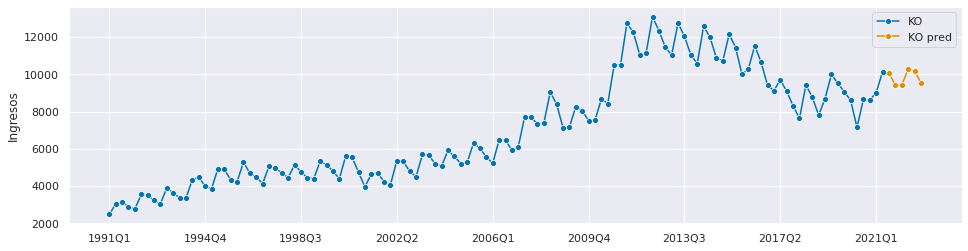

In [ ]:
# Forecast Accuracy Plot
# Plotting predictions and past data
plot_series(ko_ts_q, np.exp(log_y_pred), labels=["KO", "KO pred"])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Ingresos'>)

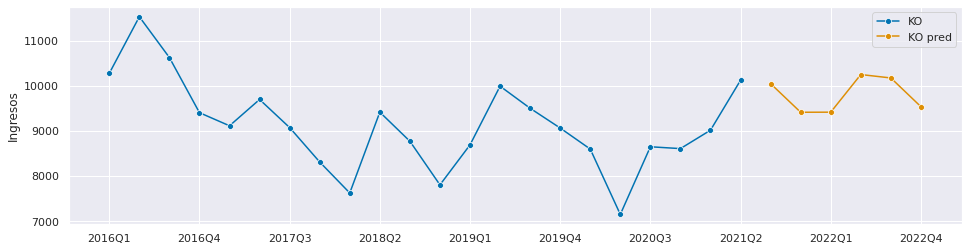

In [ ]:
# Forecast Accuracy Plot
# Plotting predictions and past data
plot_series(ko_ts_q["2016":], np.exp(log_y_pred), labels=["KO", "KO pred"])